In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the ODE function du/dt = f(t, u)
def fODE(t, u):
    return (1 - 4/3 * t) * u


In [3]:
# Define the derivative of fODE with respect to t and/or u (used in Taylor method)
def dfODE(t, u):
    return -np.exp(-t) - 0.5 * (3 + np.exp(-t) - 0.5 * u)


In [ ]:
# User inputs
t0 = float(input("Enter initial time t0: "))
u0 = float(input("Enter initial value u0: "))
h = float(input("Enter step size h: "))

In [14]:
# Time array from 0 to 5 with step size h
t = np.arange(0, 5 + h, h)
n = len(t)

In [15]:
# Exact analytical solution for comparison
exact_solution = 6 - 2 * np.exp(-t) - 3 * np.exp(-t / 2)

------------------------------

In [16]:
#Euler Method
u = np.zeros(n)
u[0] = u0
for i in range(n - 1):
    u[i + 1] = u[i] + fODE(t[i], u[i]) * h

In [17]:
#Taylor Method
z = np.zeros(n)
z[0] = u0
for i in range(n - 1):
    z[i + 1] = z[i] + fODE(t[i], z[i]) * h + dfODE(t[i], z[i]) * h**2 / 2

In [18]:
errorEuler = np.abs(exact_solution - u)
errorTaylor = np.abs(exact_solution - z)

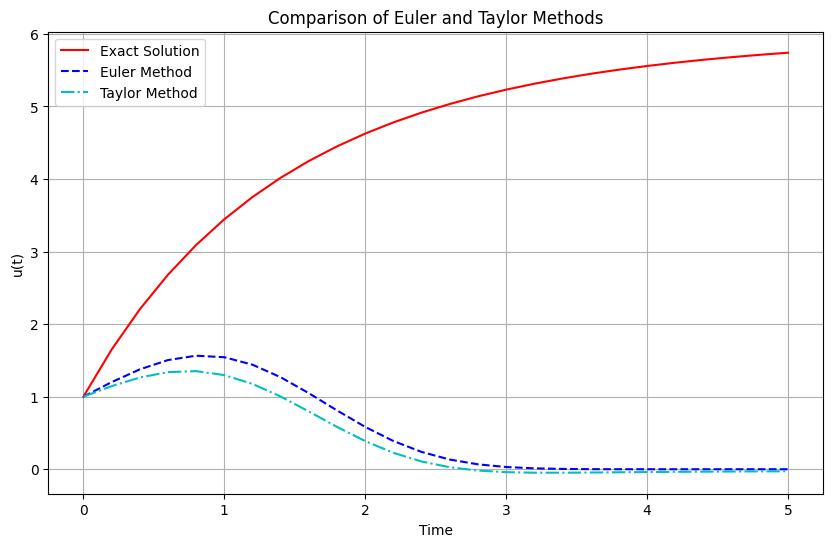

In [19]:
#Plot: Euler vs Taylor vs Exact
plt.figure(figsize=(10, 6))
plt.plot(t, exact_solution, 'r-', label='Exact Solution')
plt.plot(t, u, 'b--', label='Euler Method')
plt.plot(t, z, 'c-.', label='Taylor Method')
plt.xlabel("Time")
plt.ylabel("u(t)")
plt.legend()
plt.title("Comparison of Euler and Taylor Methods")
plt.grid(True)
plt.show()

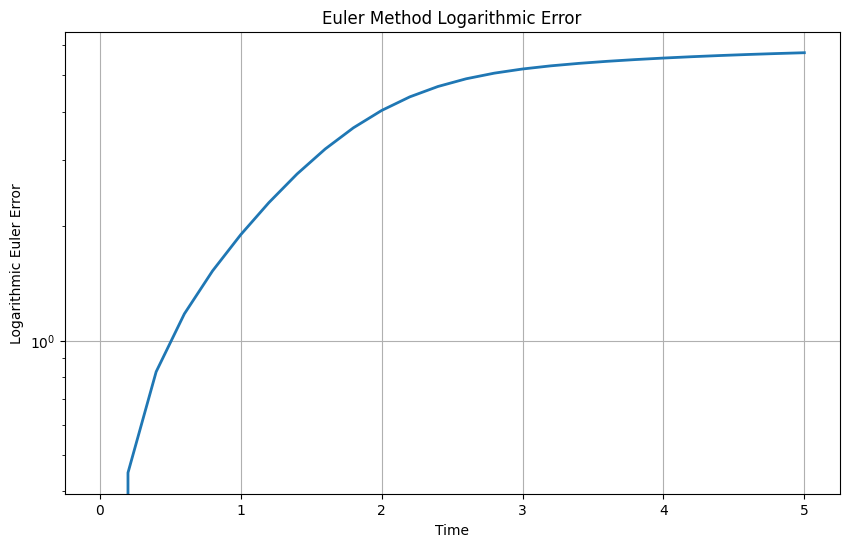

In [20]:
# Plot: Absolute Errors
plt.figure(figsize=(10, 6))
plt.semilogy(t, errorEuler, linewidth=2)
plt.xlabel("Time")
plt.ylabel("Logarithmic Euler Error")
plt.title("Euler Method Logarithmic Error")
plt.grid(True)
plt.show()